<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E02_Tu_Rut.ipynb" a "E02_12345678-9.ipynb"


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# 2) Cargue la Imagen de los Frutos Rojos

(1 Punto)

*Lea erchivo de la imagen se encuentra en este link:*

`https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png`



In [2]:
!wget https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png


--2024-08-21 18:52:33--  https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/matphwqhnd7rw8daxdnxc/frutos_rojos.png?rlkey=srmhn7v96ddelsu98i283qwlw [following]
--2024-08-21 18:52:34--  https://www.dropbox.com/scl/fi/matphwqhnd7rw8daxdnxc/frutos_rojos.png?rlkey=srmhn7v96ddelsu98i283qwlw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd1c57fb19f9f964efdd3d3c703.dl.dropboxusercontent.com/cd/0/inline/CZHR4p_F4T2I0vBD4jHGabNoReAojZpXbR5oOLlc3cUriHd3wEEl7sk1505Qp-kIiJFGOdsNxxry5N7qOM4H75GYwx2tOC9X4Z06dFXtAa3WPktPVjiU-L2IbIT5JY7OXlE/file# [following]
--2024-08-21 18:52:34--  https://ucd1c57fb19f9f964efdd3d3c703.dl.dropboxusercontent.com/cd/0/inline/CZHR4p_F4T

# 3) Despliegue la imagen cargada y su tamaño
(1 Punto)


In [3]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

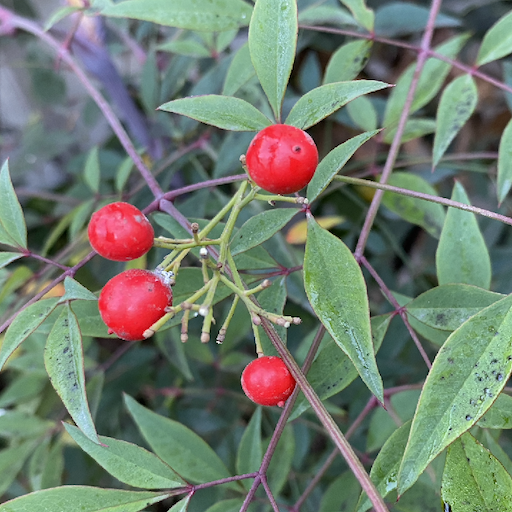

size =  (512, 512, 3)
max  =  255
min  =  0


In [4]:
X = cv2.imread('frutos_rojos.png')
cv2_imshow(X)
howis(X)

# 4) Despliegue los canales R,G,B

(1 Punto)


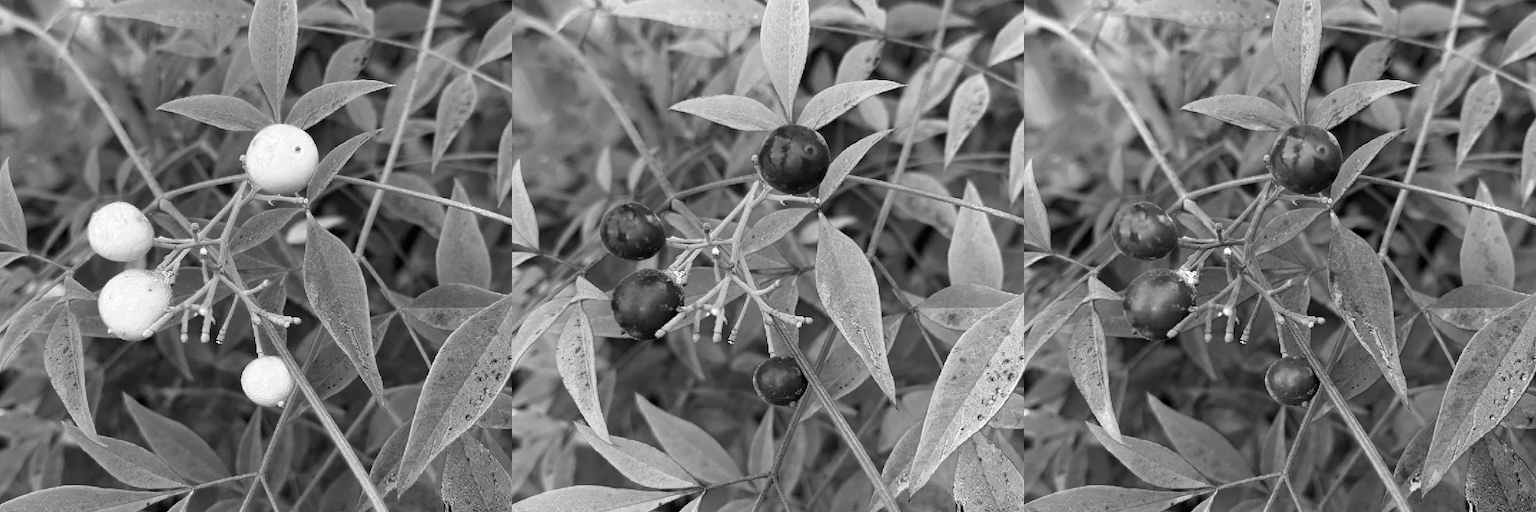

In [5]:
import numpy as np
# Blue channel
B = X[:,:,0]

# Green channel
G = X[:,:,1]

R = X[:,:,2]

I = X[:,:,[2,1,0]]

RGB = np.concatenate((R,G,B),axis=1)
cv2_imshow(RGB)

# 5) Segmente los frutos rojos

(6 Puntos)



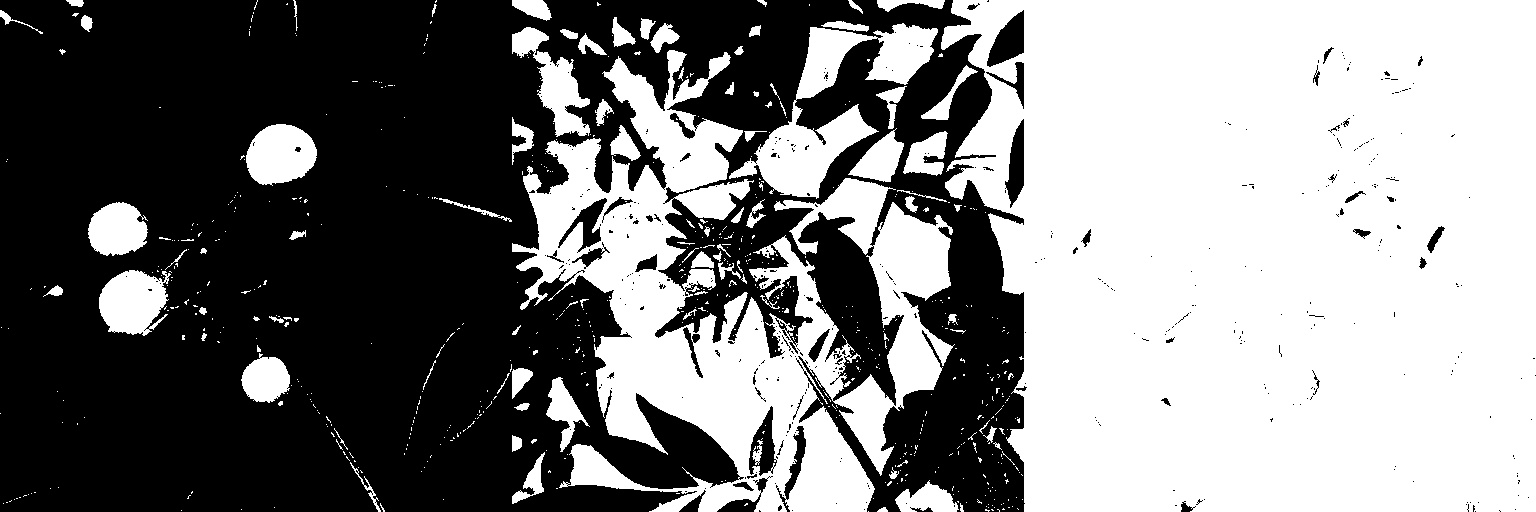

In [6]:
Sr = R>200
Sg = G<120
Sb = B>10
Srgb = np.concatenate((Sr,Sg,Sb),axis=1)
cv2_imshow(Srgb*255)

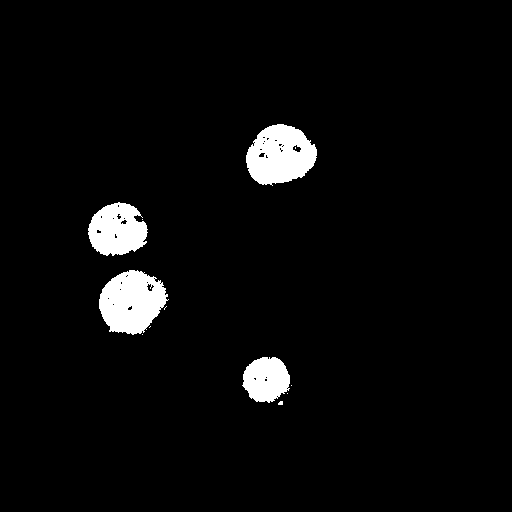

In [7]:
Srg = np.logical_and(Sr,Sg)
S   = np.logical_and(Srg,Sb) # aquí estamos concatenando las imágenes, las sumamos
cv2_imshow(S*255)

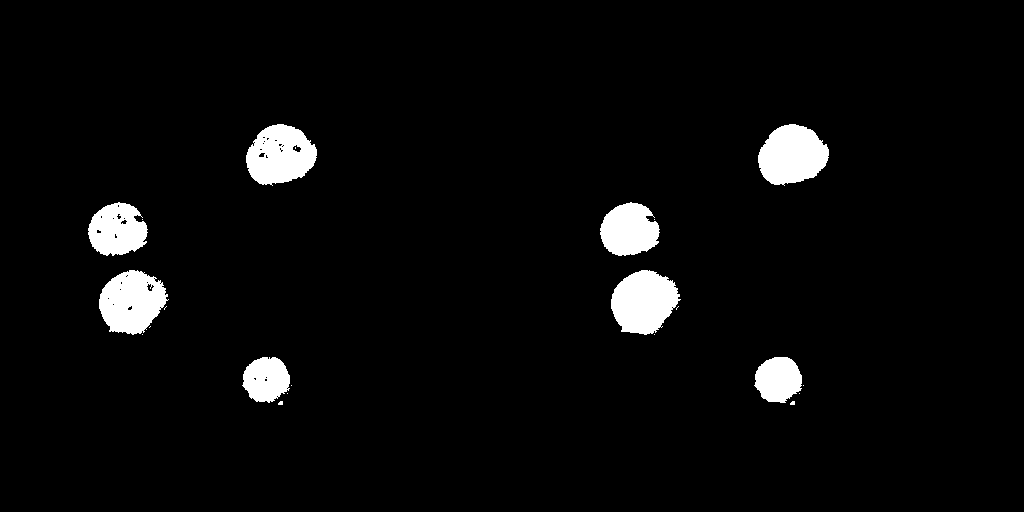

In [8]:
def rellenar(Q):
  (N, M) = Q.shape
  for i in range(N):
    blancos = [] # puntos blancos en esta fila
    for j in range(M):
      if Q[i,j] == True:
        blancos.append(j) # añadimos todos los puntos blancos de esta fila
    if len(blancos) > 0:
      for p in range(len(blancos)):
        Q[i, blancos[0] + p] = True # volvemos blancos los pixels dentro del círculo

Q = S.copy()
rellenar(Q)
SQ = np.concatenate((S, Q),axis=1)
cv2_imshow(SQ*255)

# 6) Sobreponga un borde amarillo a los frutos segmentados en la imagen a color

(2 Puntos)


In [10]:
(N, M) = Q.shape

imin = 1000
imax = 0
jmin = 1000
jmax = 0
for i in range(N):
  for j in range(M):
    if Q[i,j]>0:
      if i<imin:
        imin = i
      if i>imax:
        imax = i
      if j<jmin:
        jmin = j
      if j>jmax:
        jmax = j

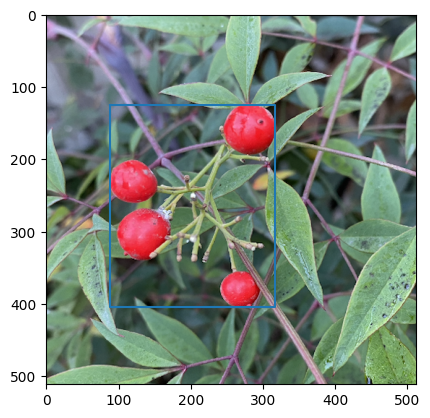

In [11]:
y = [imin,imin,imax,imax,imin]
x = [jmin,jmax,jmax,jmin,jmin]
plt.imshow(I)
plt.plot(x,y)
plt.show()

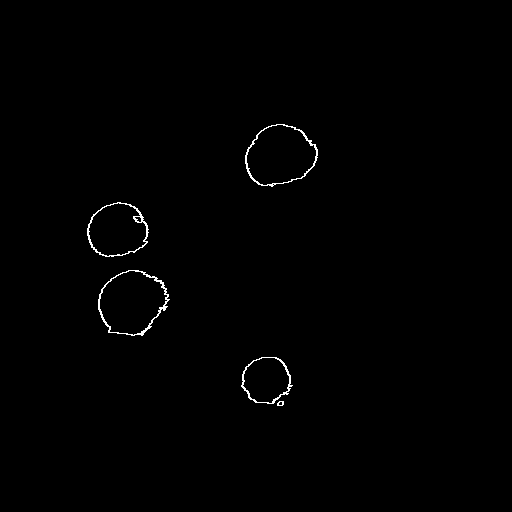

In [12]:
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]:
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]:
      E[i,j]   = 1
      E[i,j-1] = 1
cv2_imshow(E*255)

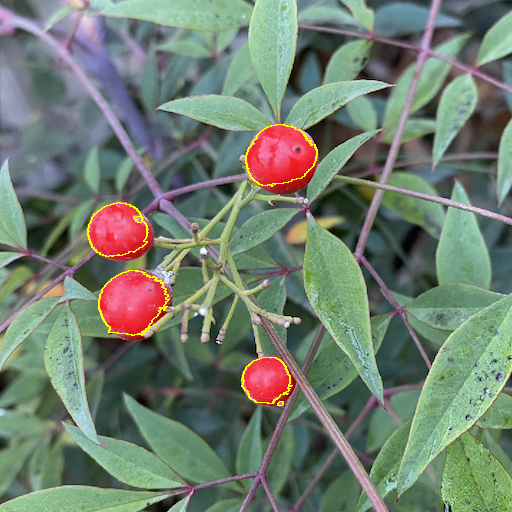

In [13]:
for i in range(N):
  for j in range(M):
    if E[i,j]==1:
      X[i,j,:] = [0,255,255]
cv2_imshow(X)

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

